<a href="https://colab.research.google.com/github/jumbokh/ML-Class/blob/main/notebook/HLP_1_sounds_clf_spectrogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np

from IPython.display import Audio
import librosa
import librosa.display

import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Add, Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization, Activation, Conv2D, MaxPooling2D, Input
from keras.utils import np_utils
from tensorflow.keras.utils import plot_model

from google.colab import drive
drive.mount('/content/drive/')

path = 'drive/MyDrive/MyProject/audio_classification/'

Mounted at /content/drive/


In [ ]:
file = path + 'pass/st_0072.wav'
Audio(file)

In [ ]:
y1, _ = librosa.load(file, sr=8000) # 把第一段音訊的wav檔讀進來
librosa.display.waveplot(y1, sr=8000) # 把第一段音訊畫出來

In [ ]:
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
?plt.imshow

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: WavFileWarning: Chunk (non-data) not understood, skipping it.
  """


(48000, array([  5440768,   5690112,   5831680, ..., -17046528, -18625792,
       -19592192], dtype=int32))


<function matplotlib.pyplot.xlabel>

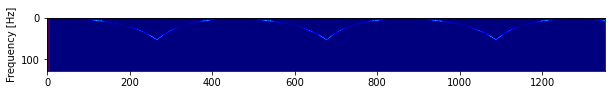

In [ ]:
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile

sample_rate, samples = wavfile.read(file)
print((sample_rate, samples))
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

plt.figure(figsize=(10,30))
plt.pcolormesh(times, frequencies, spectrogram)
plt.imshow(spectrogram, cmap = plt.cm.jet )
plt.ylabel('Frequency [Hz]')
plt.xlabel

(129, 1353)


(129, 1353)

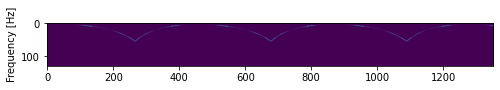

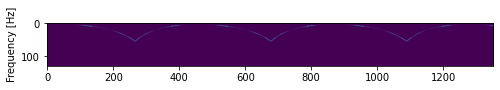

In [ ]:
#def SPECTROGRAM(file):
# sr = 8000
# length = 100

sr = sample_rate
length = 600

#sample_rate, samples = wavfile.read(file)
y1, _ = librosa.load(file, sr=sr) # 把第一段音訊的wav檔讀進來
#frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)
frequencies, times,  spectrogram = signal.spectrogram(y1, sr)
print(spectrogram.shape)

plt.figure(figsize=(8,20))
plt.pcolormesh(times, frequencies, spectrogram)
plt.imshow(spectrogram)
plt.ylabel('Frequency [Hz]')
plt.xlabel


spectrogram = (spectrogram- spectrogram.min())/(spectrogram.max()-spectrogram.min())
plt.figure(figsize=(8,20))
plt.pcolormesh(times, frequencies, spectrogram)
plt.imshow(spectrogram)
plt.ylabel('Frequency [Hz]')
plt.xlabel
spectrogram.shape

In [ ]:
def readfiles():
  path = 'drive/MyDrive/MyProject/audio_classification/'
  pos = path + '/pass/'
  neg = path  + '/leak/'
  count_p, count_n = 0, 0
  pn = len([name for name in os.listdir(pos)]) 
  nn = len([name for name in os.listdir(neg)]) 
  data = np.zeros([(pn+nn), 129,length])
  label = np.zeros([(pn+nn)])

  for i in os.listdir(pos):
    y1, _ = librosa.load(pos + i, sr) 
    frequencies, times,  y1= signal.spectrogram(y1, sr)
    y1 = (y1- y1.min())/(y1.max()-y1.min())
    y1 = y1[:, 0:length]
    data[count_p] = y1
    label[count_p] = 1
    count_p +=1

  for i in os.listdir(neg):
    y1, _ = librosa.load(neg + i, sr) 
    frequencies, times,  y1 = signal.spectrogram(y1, sr)
    y1 = (y1- y1.min())/(y1.max()-y1.min())

    y1 = y1[:, 0:length]
    data[count_p + count_n] = y1
    label[count_p+count_n] = 0
    count_n +=1

  return label, data, (pn+nn)

if os.path.exists(path + "data/data_l_spectrogram48000.npy"):
  print('data existed!')
  l = np.load(path + 'data/data_l_spectrogram48000.npy')
  d = np.load(path + 'data/data_d_spectrogram48000.npy')
  n = np.load(path + 'data/data_n_spectrogram48000.npy')
else:  
  l, d, n = readfiles()
  np.save(path + 'data/data_l_spectrogram48000', l)
  np.save(path + 'data/data_d_spectrogram48000', d)
  np.save(path + 'data/data_n_spectrogram48000', n)


data existed!


In [ ]:
n # 397
l.shape #397
l.sum() # 197 "1"
n - l.sum() #200 "0"
d.shape # (397, 129, 600)

(397, 129, 600)

In [ ]:
l = l.reshape(n, 1) # label
d = d.reshape(n, 129, length, 1)

In [ ]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(d, l, test_size = 0.3, random_state = 43)

In [ ]:
print('\n', train_x.shape, '\n', test_x.shape, '\n', train_y.shape, '\n', test_y.shape)


 (277, 129, 600, 1) 
 (120, 129, 600, 1) 
 (277, 1) 
 (120, 1)


In [ ]:
train_y = np_utils.to_categorical(train_y, 2)
test_y = np_utils.to_categorical(test_y, 2)

In [ ]:
print(train_y[:,0].sum()) #275
print(train_y[:,1].sum()) #280
print(test_y[:,0].sum()) #275
print(test_y[:,1].sum()) #114

138.0
139.0
62.0
58.0


In [ ]:
model = Sequential()
model.add(Conv2D(200, (3, 3), input_shape=(129, length, 1)))
model.add(BatchNormalization()) 
model.add(Activation("relu"))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(200, (3,3)))
model.add(BatchNormalization()) 
model.add(Activation("relu"))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(200, (3,3)))
model.add(BatchNormalization()) 
model.add(Activation("relu"))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(200, (3,3)))
model.add(BatchNormalization()) 
model.add(Activation("relu"))
model.add(MaxPooling2D((2,2)))


model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 127, 598, 200)     2000      
_________________________________________________________________
batch_normalization_28 (Batc (None, 127, 598, 200)     800       
_________________________________________________________________
activation_20 (Activation)   (None, 127, 598, 200)     0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 63, 299, 200)      0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 61, 297, 200)      360200    
_________________________________________________________________
batch_normalization_29 (Batc (None, 61, 297, 200)      800       
_________________________________________________________________
activation_21 (Activation)   (None, 61, 297, 200)      0

In [ ]:
#model.load_weights(path + 'logs0526/' + 'model.11-1.10.h5')
#model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
#model.evaluate(test_x, test_y)

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(train_x, train_y, epochs =100, validation_split= 0.2 , batch_size= 32, verbose = 1)

model.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])
history = model.fit(train_x, train_y, epochs =50, validation_split= 0.2 , batch_size= 32, verbose = 1)


log_dir = path + 'logs0624_spectrogram/'
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=25),
    tf.keras.callbacks.ModelCheckpoint(filepath=log_dir + 'model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir=log_dir),
]
#model.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])
# 這一行是跑完 logs0527_PR 之後才 remove 掉，因為觀察到重下 compile，val_loss 有點跳太大，可能是 learning rate 重設了？？？？
# 不過在 logs0527 (patience = 20) 採用 epochs (250, 50, 300) 似乎沒有這個現象
history = model.fit(train_x, train_y, epochs =300, validation_split= 0.2 , batch_size= 32, verbose = 1, callbacks=my_callbacks)
model.evaluate(test_x, test_y)



Epoch 1/100
7/7 [==============================] - 8s 646ms/step - loss: 6.7285 - accuracy: 0.4999 - val_loss: 0.7966 - val_accuracy: 0.3750
Epoch 2/100
7/7 [==============================] - 2s 285ms/step - loss: 2.9996 - accuracy: 0.6666 - val_loss: 0.7788 - val_accuracy: 0.3929
Epoch 3/100
7/7 [==============================] - 2s 288ms/step - loss: 3.0506 - accuracy: 0.5713 - val_loss: 0.7459 - val_accuracy: 0.6071
Epoch 4/100
7/7 [==============================] - 2s 286ms/step - loss: 2.3663 - accuracy: 0.4794 - val_loss: 0.6982 - val_accuracy: 0.3929
Epoch 5/100
7/7 [==============================] - 2s 287ms/step - loss: 1.7561 - accuracy: 0.4851 - val_loss: 0.6805 - val_accuracy: 0.6071
Epoch 6/100
7/7 [==============================] - 2s 287ms/step - loss: 1.2571 - accuracy: 0.5510 - val_loss: 0.6819 - val_accuracy: 0.6071
Epoch 7/100
7/7 [==============================] - 2s 287ms/step - loss: 1.0196 - accuracy: 0.4617 - val_loss: 0.6812 - val_accuracy: 0.6071
Epoch 8/100
7

[1.1611965894699097, 0.8916666507720947]

In [ ]:
model.evaluate(test_x, test_y) #CNN1D we got 0.9331, here, CNN2D, we have 0.9250 @sr = 8000, and 0.9000 @sr=48000

4/4 [==============================] - 0s 75ms/step - loss: 1.1612 - accuracy: 0.8917


[1.1611965894699097, 0.8916666507720947]

In [ ]:
#model.load_weights(path + 'logs0527_PR/' + 'model.01-0.93.h5')
#model.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])
model.evaluate(test_x, test_y)


4/4 [==============================] - 0s 76ms/step - loss: 1.1612 - accuracy: 0.8917


[1.1611965894699097, 0.8916666507720947]

In [ ]:
model.evaluate(test_x, test_y)
model.save(path + 'CNN2D_save.h5')
model.save_weights(path + 'CNN2D_save_weights.h5')


4/4 [==============================] - 0s 76ms/step - loss: 1.1612 - accuracy: 0.8917


In [ ]:
'''
model.save(path + '08536_save.h5')
model.save_weights(path + '08536_save_weights.h5')

model.evaluate(test_x, test_y)
'''

"\nmodel.save(path + '08536_save.h5')\nmodel.save_weights(path + '08536_save_weights.h5')\n\nmodel.evaluate(test_x, test_y)\n"

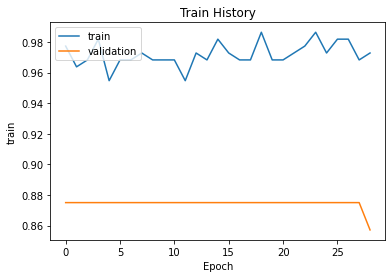

In [ ]:
import matplotlib.pyplot as plt

def show_train_progress(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel('train')
    plt.xlabel('Epoch')
    #plt.legend(['train','validation'],loc='upper left')
    plt.legend(['train','validation'],loc=2)
    
    plt.show()
show_train_progress(history,'accuracy','val_accuracy')    

In [ ]:
scores = model.evaluate(test_x, test_y)

4/4 [==============================] - 0s 77ms/step - loss: 1.1612 - accuracy: 0.8917


In [ ]:
test_y[:,0].astype('int')
prediction = model.predict_classes(test_x)
print(prediction)
print(test_y[:,1].astype('int'))

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 1
 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 1 1 0 1 0
 1 1 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 1 0 0 0 1 0 1 1 0 0 1
 1 0 1 0 0 0 0 1 0]
[1 0 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 1
 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 1 1 0 1 0
 0 1 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1
 1 0 1 0 0 0 1 1 0]


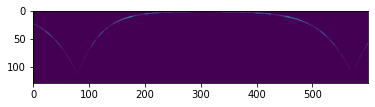

In [ ]:
plt.imshow(test_x[1].reshape(129,length))

In [ ]:
train_x.shape

(277, 129, 600, 1)

# if spectrogram

In [ ]:
'''
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile

sample_rate, samples = wavfile.read('path-to-mono-audio-file.wav')
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

plt.pcolormesh(times, frequencies, spectrogram)
plt.imshow(spectrogram)
plt.ylabel('Frequency [Hz]')
plt.xlabel
'''

"\nimport matplotlib.pyplot as plt\nfrom scipy import signal\nfrom scipy.io import wavfile\n\nsample_rate, samples = wavfile.read('path-to-mono-audio-file.wav')\nfrequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)\n\nplt.pcolormesh(times, frequencies, spectrogram)\nplt.imshow(spectrogram)\nplt.ylabel('Frequency [Hz]')\nplt.xlabel\n"

# RESNET STURCTRUCT, BUT IT SEEMS NO NECESSARY... 



```
# lets create model now
def resblock(X, f):
    '''
    function for creating res block
    X is a layer input, and f is neurons number
    '''
    X_copy = X  #copy of input
    
    # main path
    X = Conv2D(f, kernel_size=(1,1), kernel_initializer='he_normal')(X)
    X = BatchNormalization()(X)
    X = Activation('relu')(X)
    
    X = Conv2D(f, kernel_size=(3,3), padding='same', kernel_initializer='he_normal')(X)
    X = BatchNormalization()(X)
    
    # shortcut path
    X_copy = Conv2D(f, kernel_size=(1,1), kernel_initializer='he_normal')(X_copy)
    X_copy = BatchNormalization()(X_copy)
    
    # Adding the output from main path and short path together
    X = Add()([X, X_copy])
    X = Activation('relu')(X)
    
    return X
```



```
input_shape = (129, length, 1)
X_input = Input(input_shape) #iniating tensor of input shape

# Stage 1
conv_1 = Conv2D(64, (3,3))(X_input)
conv_1 = BatchNormalization()(conv_1)
conv_1 = Activation("relu")(conv_1)
conv_1 = Conv2D(64, (3,3))(conv_1)
conv_1 = BatchNormalization()(conv_1)
conv_1 = Activation("relu")(conv_1)
pool_1 = MaxPooling2D((2,2))(conv_1)


# stage 2
conv_2 = resblock(pool_1, 32)
pool_2 = MaxPooling2D((2,2))(conv_2)

# Stage 3
conv_3 = resblock(pool_2, 64)
pool_3 = MaxPooling2D((2,2))(conv_3)

# Stage 4
conv_4 = resblock(pool_3, 128)
pool_4 = MaxPooling2D((2,2))(conv_4)

# Stage 5 (bottle neck)
conv_5 = resblock(pool_4, 256)

x = Flatten()(conv_5)
x = Dense(256, activation = 'relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation = 'relu')(x)
out = Dense(2, activation = 'softmax')(x)


model = Model(X_input, out)
model.summary()
plot_model(model)
```



